In [125]:
file = r"Z:\WP Space\WP 4\Spectrum database\Data from ELoDiz\txt files graphene BWTek iRaman Plus 785S\Sample 2 5min analysis Run2.txt"

In [115]:
# Using readlines()
file1 = open(file, 'r')
Lines = file1.readlines()

In [4]:
Lines[0]

'File Version;BWRam4.10\n'

In [14]:
Lines[0].split(';')[1][:-2]

'BWRam4.1'

In [4]:
def get_data_startline(file):
    file1 = open(file, 'r')
    Lines = file1.readlines()
    for ii, l in enumerate(Lines):
        if l[0].isdigit():
            return ii-1

In [17]:
get_data_startline(file)

88

In [18]:
meta = {}

In [19]:
meta[Lines[0].split(';')[0]] = Lines[0].split(';')[1][:-2]

In [20]:
meta

{'File Version': 'BWRam4.1'}

In [23]:
meta = {}
for l in Lines[:88]:
    meta[l.split(';')[0]] = l.split(';')[1][:-2]

In [116]:
def get_meta(file):
    file1 = open(file, 'r')
    Lines = file1.readlines()
    meta = {}
    start_n = get_data_startline(file)
    for l in Lines[:start_n]:
        meta[l.split(';')[0]] = l.split(';')[1][:-2]
    return meta

In [117]:
get_meta(file)

{'File Version': 'BWRam4.1',
 'Date': '2017-12-12 11:19:3',
 'title': 'BWS465-532',
 'model': 'BTC665N-532H-SY',
 'c code': 'RO',
 'operator': '',
 'port1': '',
 'baud1': '',
 'pixel_start': '',
 'pixel_end': '204',
 'step': '',
 'units': '',
 'bkcolor': '1677721',
 'show_mode': '',
 'data_mode': '',
 'pixel_mode': '',
 'intigration times(ms)': '6000',
 'average number': '',
 'time_multiply': '',
 'spectrometer_type': '7',
 'yaxis': '',
 'yaxis_min': '-50',
 'yaxis_max': '200',
 'xaxis': '',
 'xaxis_min': '',
 'xaxis_max': '204',
 'irrands_DispWLMin': '10',
 'irrands_DispWLMax': '100',
 'yaxis_min_6': '',
 'yaxis_max_6': '6553',
 'irradiance_unit': '',
 'Color_Data_Flag': '',
 'Color_StartWL': '53',
 'Color_EndWL': '65',
 'Color_IncWL': '1',
 'power_unit_index': '',
 'photometric_index': '',
 'Illuminant_index': '',
 'observer_index': '',
 'lab_l': '',
 'lab_a': '',
 'lab_b': '',
 'radiometric_flag': '',
 'coefs_a0': '529.11960265238',
 'coefs_a1': '0.06852112433378',
 'coefs_a2': '-3.

In [7]:
start_n = get_data_startline(file)
titles = Lines[start_n].split(';')
titles

['Pixel',
 'Wavelength',
 'Wavenumber',
 'Raman Shift',
 'Dark',
 'Reference',
 'Raw data #1',
 'Dark Subtracted #1',
 '%TR #1',
 'Absorbance #1',
 'Irradiance (W/cm^2/nm) #1',
 '\n']

In [83]:
start_n = get_data_startline(file)
numbers = Lines[start_n+1].split(';')
numbers

['0',
 '   ',
 '   ',
 '   ',
 '934,2000',
 '65535,0000',
 '907,4000',
 '-26,8000',
 '0,0000',
 '0,0000',
 '0,0000',
 '\n']

In [17]:
import numpy as np

In [16]:
['Dark Subtracted' in t for t in titles].index(True)

7

In [118]:
def get_data(file):
    counts = []
    wavenumbers = []
    file1 = open(file, 'r')
    Lines = file1.readlines()
    column_names_n = get_data_startline(file)
    column_names = Lines[column_names_n].split(';')
    wn_index = column_names.index('Raman Shift')
    cts_index = ['Dark Subtracted' in c for c in column_names].index(True)
    for l in Lines[column_names_n+1:]:
        if not l.split(';')[wn_index].isspace():
            wavenumbers.append(l.split(';')[wn_index].replace(",", "."))
            counts.append(l.split(';')[cts_index].replace(",", "."))
    return np.double(wavenumbers), np.double(counts)

In [126]:
w, c = get_data(file)

In [120]:
import matplotlib.pyplot as plt

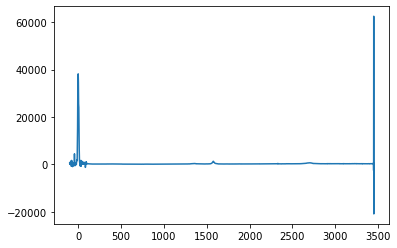

In [127]:
plt.plot(w, c)
plt.show()

In [128]:
file = r"Z:\WP Space\WP 4\Spectrum database\WITec and BWtek from FNMT\ICV-BWS415-785S_BTA_PS.txt.txt"

In [131]:
w, c = get_data(file)

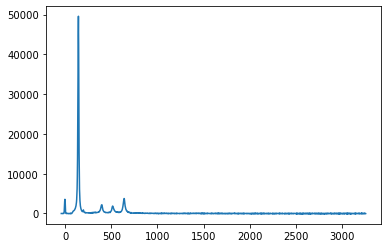

In [132]:
plt.plot(w, c)
plt.show()